In [1]:
from tools.basic.path_gen  import path_gen
from tools.step.pprint     import pprint

from models.direct.InflationDirect.default                  import default
from models.direct.InflationDirect.RunInflationDirect import RunInflationDirect
import os,glob

In [2]:
main_path = os.path.join("output", path_gen())

In [3]:
main_path = os.path.join("output", path_gen())
join = os.path.join
gmsh_path = glob.glob(join(".." , "T03_gmsh_direct", "output", "*"))

In [4]:
main_path = ["output"]
join = os.path.join
gmsh_path = glob.glob(join(".." , "T03_gmsh_direct", "output", "*"))
gmsh_path = [ os.path.basename(i).replace(".json","") for i in gmsh_path]

In [5]:
gmsh_path

['2024-09-17__15-17-19__42972',
 '2024-09-17__15-17-22__83515',
 '2024-09-17__15-28-06__78054',
 '2024-09-17__15-28-17__86061',
 '2024-09-17__15-33-37__24172',
 '2024-09-17__15-34-32__51162',
 '2024-09-17__15-46-06__48696',
 '2024-09-17__16-06-18__45761',
 '2024-09-17__16-30-42__31243',
 '2024-09-17__16-47-02__99149',
 '2024-09-17__17-07-03__69085',
 '2024-09-17__17-11-27__91535',
 '2024-09-17__17-17-09__64968',
 '2024-09-17__17-26-18__90637',
 '2024-09-17__18-18-07__97611',
 '2024-09-17__18-20-31__98627',
 '2024-09-17__18-42-09__22375',
 '2024-09-17__18-42-25__11825',
 '2024-09-18__05-01-55__65627',
 '2024-09-18__05-02-16__84603',
 '2024-09-18__12-53-24__65130',
 '2024-09-18__12-56-47__57821',
 '2024-09-18__13-11-27__84837',
 '2024-09-18__13-31-43__72724',
 '2024-09-18__13-33-13__79133',
 '2024-09-18__13-34-54__40508',
 '2024-09-18__13-42-55__63978',
 '2024-09-18__13-45-00__13888',
 '2024-09-18__14-00-38__50084',
 '2024-09-18__15-51-05__63503',
 '2024-09-19__11-51-43__85027',
 '2024-0

# Step 04. INFLATION

In [6]:
params_infl = default()

params_infl["gmsh_path"] = gmsh_path[-1]
params_infl["auto_pressure"] = True
params_infl["pressure"]  = 800 # Pa
params_infl["OMP_NUM_THREADS"]     = 4
params_infl["mpi"]       = True
params_infl["mpi_np"]    = 4
params_infl["nsteps"]    = 2
pprint(params_infl)

settings_step       : 
	- has_children
	-has_parent
	-verbose
	-...
pressure            : 800
OMP_NUM_THREADS     : 4
attemps             : 4
surface_behavior    : 
	- type
	-dist
	-pressure
	-...
radius_target       : 10
rho                 : 0.00097
calculix_dynamic    : False
mpi                 : True
mpi_np              : 4
nsteps              : 2
nlgeom              : True
gmsh_path           : 2024-09-24__11-23-56__79641
auto_pressure       : True
ties_activate       : False


In [7]:
pprint(params_infl["surface_behavior"])

type                : hard
dist                : 0.1
pressure            : 1000


In [8]:
RunInflationDirect(params_infl,main_path)

(-0.1, 0.025)

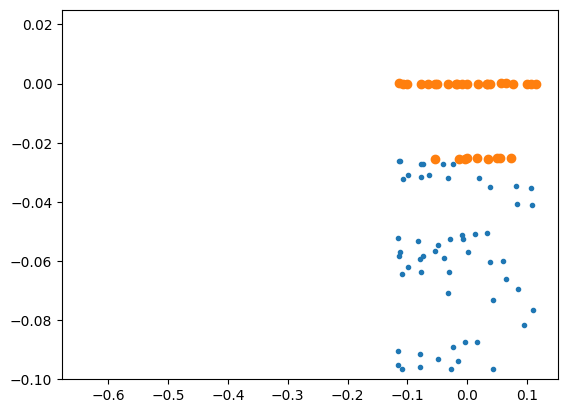

In [3]:
from matplotlib import pyplot as plt
from tools.basic.loadsavejson import loadjson

nodes_rot = loadjson("nodes.json")["nodes_rot"]
bol = loadjson("nodes.json")["bol"]
plt.plot(nodes_rot[:,0],nodes_rot[:,1],".")
plt.plot(nodes_rot[bol,0],nodes_rot[bol,1],"o")
plt.ylim(-0.1,0.025)

In [6]:
nodes_rot[:,1]

array([-0.69324915, -0.12859037, -1.18798239, ..., -0.34229123,
       -0.34843688, -1.4429085 ])

In [9]:
import numpy as np
tie = []
for i in np.arange(0,64,4):
    for k in range(3):
        tie.append([i+k+1,i+k+2])
        print(i+k+1,i+k+2)

1 2
2 3
3 4
5 6
6 7
7 8
9 10
10 11
11 12
13 14
14 15
15 16
17 18
18 19
19 20
21 22
22 23
23 24
25 26
26 27
27 28
29 30
30 31
31 32
33 34
34 35
35 36
37 38
38 39
39 40
41 42
42 43
43 44
45 46
46 47
47 48
49 50
50 51
51 52
53 54
54 55
55 56
57 58
58 59
59 60
61 62
62 63
63 64


In [10]:
pprint(params_infl)

settings_step       : 
	- has_children
	-has_parent
	-verbose
	-...
pressure            : 522.3529411764707
OMP_NUM_THREADS     : 4
attemps             : 4
surface_behavior    : 
	- type
	-dist
	-pressure
	-...
radius_target       : 10
rho                 : 0.00097
mpi                 : True
mpi_np              : 4
nsteps              : 2
nlgeom              : True
gmsh_path           : 2024-09-24__09-58-02__76124
auto_pressure       : True
ties_activate       : False
function            : 
	- name
	-file
	-...
metadata            : 
	- elapsed
	-error
	-error_msg
	-init_time
	-final_time
	-...
simulation_path     : 2024-09-24__11-15-28__24265
lammps_params       : 
	- settings_step
	-Npoints
	-hilo_central
	-theta
	-factor
	-Remesh
	-RUN_STEPS_EQ
	-RUN_STEPS_DEFORM
	-errate
	-nhilos
	-...
gmsh_params         : 
	- settings_step
	-factor_radius
	-factor_mesh_min
	-factor_mesh_max
	-debug
	-refine
	-lammps_path
	-factor_length
	-Nalma
	-function
	-...
h                   : 25.2616700174

In [11]:
err

NameError: name 'err' is not defined

In [ ]:
import os
from tools.step.rerun import rerun
json_file = os.path.join(*(main_path + \
                           [params_infl["simulation_path"]])) + ".json"

In [ ]:
rerun(json_file,overwrite=True)

In [ ]:
points1 = np.array([ [0.0, 0.0, 0.0],
                     [1.0, 0.0, 0.0],
                     [1.0, 1.0, 0.0],
                     [0.0, 1.0, 0.0] ])

